# NLP with BERT for Text Classification

## Importing modules

In [ ]:
#pip install ktrain

In [ ]:
import ktrain
from ktrain import text

In [ ]:
DATA_PATH = '/bert.csv'
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,'comment_text',
                      label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"],
                      maxlen=150,
                      ngram_range=1,preprocess_mode='bert')

detected encoding: utf-8 (if wrong, set manually)
preprocessing train...
language: en


Is Multi-Label? True
preprocessing test...
language: en


In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face [https://arxiv.org/abs/1910.01108]


## Training the model

In [ ]:
model = text.text_classifier('bert',train_data=(x_train,  y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train,  y_train), val_data=(x_test, y_test))

Is Multi-Label? True
maxlen is 150
done.


In [ ]:
learner.lr_find(max_epochs=3)

simulating training for different learning rates... this may take a few moments...
Train on 18000 samples
Epoch 1/3
18000/18000 [==============================] - 481s 27ms/sample - loss: 0.4149 - accuracy: 0.8003
Epoch 2/3
18000/18000 [==============================] - 463s 26ms/sample - loss: 0.1323 - accuracy: 0.9669
Epoch 3/3
   32/18000 [..............................] - ETA: 7:43 - loss: 1.0122 - accuracy: 0.9167

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


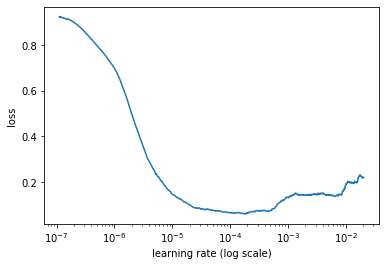

In [ ]:
learner.lr_plot()

In [ ]:
learner.autofit(0.0007, 3)



begin training using triangular learning rate policy with max lr of 0.0007...
Train on 18000 samples, validate on 2000 samples
Epoch 1/3
18000/18000 [==============================] - 496s 28ms/sample - loss: 0.1604 - accuracy: 0.9566 - val_loss: 0.1567 - val_accuracy: 0.9583
Epoch 2/3
18000/18000 [==============================] - 476s 26ms/sample - loss: 0.1443 - accuracy: 0.9628 - val_loss: 0.1576 - val_accuracy: 0.9583
Epoch 3/3
18000/18000 [==============================] - 477s 27ms/sample - loss: 0.1445 - accuracy: 0.9628 - val_loss: 0.1574 - val_accuracy: 0.9583


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.predict(["If you don't stop immediately, I will kill you."])

[[('toxic', 0.09507042),
  ('severe_toxic', 0.010912889),
  ('obscene', 0.05114879),
  ('threat', 0.002506852),
  ('insult', 0.04408965),
  ('identity_hate', 0.0056467443)]]

In [ ]:
predictor.predict(["Okay - I'm calling it a night. See you tomorrow."])

[[('toxic', 0.09507042),
  ('severe_toxic', 0.010912889),
  ('obscene', 0.051148765),
  ('threat', 0.002506852),
  ('insult', 0.04408966),
  ('identity_hate', 0.0056467443)]]

## Save the model

In [ ]:
predictor.save('/tmp/toxic_detector')
predictor = ktrain.load_predictor('/tmp/toxic_detector')